In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# load data
file_path = "/Users/magdalenarepp/Downloads/emotion_sentimen_dataset.csv"
df = pd.read_csv(file_path)

# first look at data frame
df.head()

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral


In [ ]:
# remove unneccessary columns
df = df.drop(columns=["Unnamed: 0"])

In [12]:
# Absolute frequency of emotions
emotion_counts = df['Emotion'].value_counts()

# Percentage distribution
emotion_percent = df['Emotion'].value_counts(normalize=True) * 100

# Table with absolute and percentage distribution
emotion_distribution = pd.DataFrame({
    "Anzahl": emotion_counts,
    "Prozent": emotion_percent.round(2)
})

emotion_distribution

,Anzahl,Prozent
Emotion,,
neutral,674538,80.34
love,39553,4.71
happiness,27175,3.24
sadness,17481,2.08
relief,16729,1.99
hate,15267,1.82
anger,12336,1.47
fun,10075,1.20
enthusiasm,9304,1.11


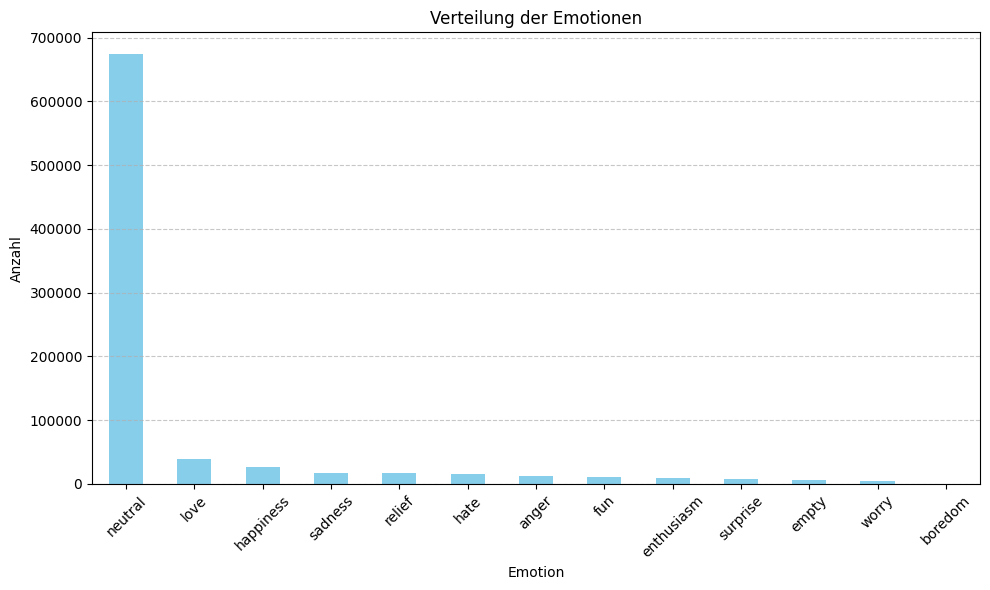

In [ ]:
# plot histogramm
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title("Verteilung der Emotionen")
plt.xlabel("Emotion")
plt.ylabel("Anzahl")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
# show 10 examples for "love"
df[df['Emotion'] == 'empty']['text'].head(10)


42      i feel and some is just a hateful of hollow ye...
241     i guess avoiding the boundaries conversation w...
866     i want to find my essence and my substance and...
1452    i do how empty disappointed angry sad chaotic ...
1598    i got inside it was so warm compared to the ou...
1794                    i want to avoid feeling terrified
2075    i feel hateful to have given up my friendship ...
2085    i asked that no one gift me but if i go to my ...
2146      i can feel them cool but seldom empty pale with
2220    i am normally better at avoiding the expensive...
Name: text, dtype: object

In [21]:
from transformers import pipeline

classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

sentences = df["text"]

model_outputs = classifier(sentences)
print(model_outputs[0])
# produces a list of dicts for each of the labels

config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

Device set to use mps:0


ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).